#### IPT. Partie I (initiation à la programmation). C.5.

# Terminaison, validité, complexité

## Terminaison d'un algorithme

La _terminaison_ est une propriété fondamentale des algorithmes. Elle stipule que les calculs décrits par l'algorithme s'arrêteront. En général cet arrêt doit avoir lieu quelles que soient les données initiales que l'on fournit à l'algorithme.

On donne ci-dessous quelques exemples permettant de s'assurer que cette propriété est vérifiée.

La question se pose principalement dans le cas d'utilisation de boucles (puisque le programme va répéter un certain nombre de fois des instructions).

### Terminaison d'une boucle `for`

Les boucles de type `for` sont fréquemment utilisées de manière sûre car le plus souvent elles parcourent une liste finie d'objets. On n'a alors pas à craindre que le programme reste bloqué au niveau de cette boucle :

    def fibo(n):
        a, b = 0, 1
        for _ in range(2, n+1):
            a, b = b, a+b
        return b

Attention, quelques usages moins habituels de `for` peuvent en réalité devenir problématiques :

    l = [42]
    for e in l:
        l.append(42)

### Terminaison d'une boucle `while`

Les boucles `while` sont les plus problématiques car elles reposent sur un test qui peut rester indéfiniment vrai :

    i = 0
    while i < 100:
        print("Hello world")
    # Ici, le programmeur a oublié d'incrémenter i

Pour prouver la terminaison d'une boucle `while`, on doit justifier que le test d'entrée dans cette boucle renverra `False` après un nombre fini de passages.

In [17]:
n = 100
a, b = 0, 1
while b < n:
    a, b = b, a+b
print(b) # premier nombre de Fibonacci supérieur ou égal à 100

144


Dans l'exemple précédent, le premier passage n'augmente pas la valeur de b, mais on passe alors à un nouvel état :

    a, b = 1, 1

puis on remarque que la valeur de `b` est strictement plus grande à chaque passage. Après un nombre fini d'étapes, cette valeur sera donc plus grande que `n` (quel que soit ce nombre préalablement fixé).

#### Notion de variant de boucle

Dans le cas des boucles plus complexes, il est nécessaire d'exhiber un _variant de boucle_. Un variant de boucle est une expression dépendant des variables utilisées dans la boucle et _prenant des valeurs entières positives strictement décroissantes_.

Dans le cas des boucles `for`, le variant de boucle est généralement du type `n-i`.

In [68]:
def pgcd(a,b):
    while b > 0:
        a, b = b, a%b
        print(b)
    return a

pgcd(36937163, 18851309)

18085854
765455
480389
285066
195323
89743
15837
10558
5279
0


5279

Parfois les variables utilisées ne sont pas directement entières et positives, mais on doit pouvoir donner une expression du type souhaité à l'aide d'une multiplication par une constante, d'une partie entière, d'une valeur absolue, etc.

In [29]:
def solve_dichot(f, a, b, eps=1e-12):
    fa = f(a)
    assert fa*f(b) < 0, "Fonction de même signe aux deux bornes"
    while b-a > eps:
        c = (a+b)/2
        fc = f(c)
        if fc*fa > 0: a=c
        else: b=c
    return (a+b)/2

f = lambda x: 3*x**3 - 5*x**2 + 11*x - 4
solve_dichot(f, 0, 1, 0.001)

0.42431640625

In [32]:
# calcul d'un variant de boucle possible

def solve_dichot(f, a, b, eps=1e-12):
    fa = f(a)
    assert fa*f(b) < 0, "Fonction de même signe aux deux bornes"
    while b-a > eps:
        variant = int((b-a)/eps)
        print(variant)
        c = (a+b)/2
        fc = f(c)
        if fc*fa > 0: a=c
        else: b=c
    return (a+b)/2

f = lambda x: 3*x**3 - 5*x**2 + 11*x - 4
solve_dichot(f, 0, 1, 0.001)

1000
500
250
125
62
31
15
7
3
1


0.42431640625

### Un exemple complexe de terminaison

Une fourmi est prisonnière d'une grille de cases contiguës ; la grille peut avoir une forme complexe, y compris concave du moment que l'on puisse toutes les visiter à l'aide des quatre mouvements de base (gauche, droite, haut, bas). Pour des raisons de commodité, on prend ci-dessous une grille rectangulaire, mais on doit pouvoir imaginer n'importe quelle forme. Sur chaque case, une aiguille donne l'une des quatre directions. À chaque étape, la fourmi se rend dans la case indiquée par l'aiguille ; s'il y a un mur (ou un bord) elle est forcée de rester dans la même case. Après ce mouvement (ou une période d'immobilité forcée), l'aiguille de cette case tourne d'un quart de tour.

La figure ci-dessous représente une grille de ce genre ; l'étoile rouge indique l'unique sortie possible :

(-0.9500000000000001, 19.95, -0.5, 10.5)

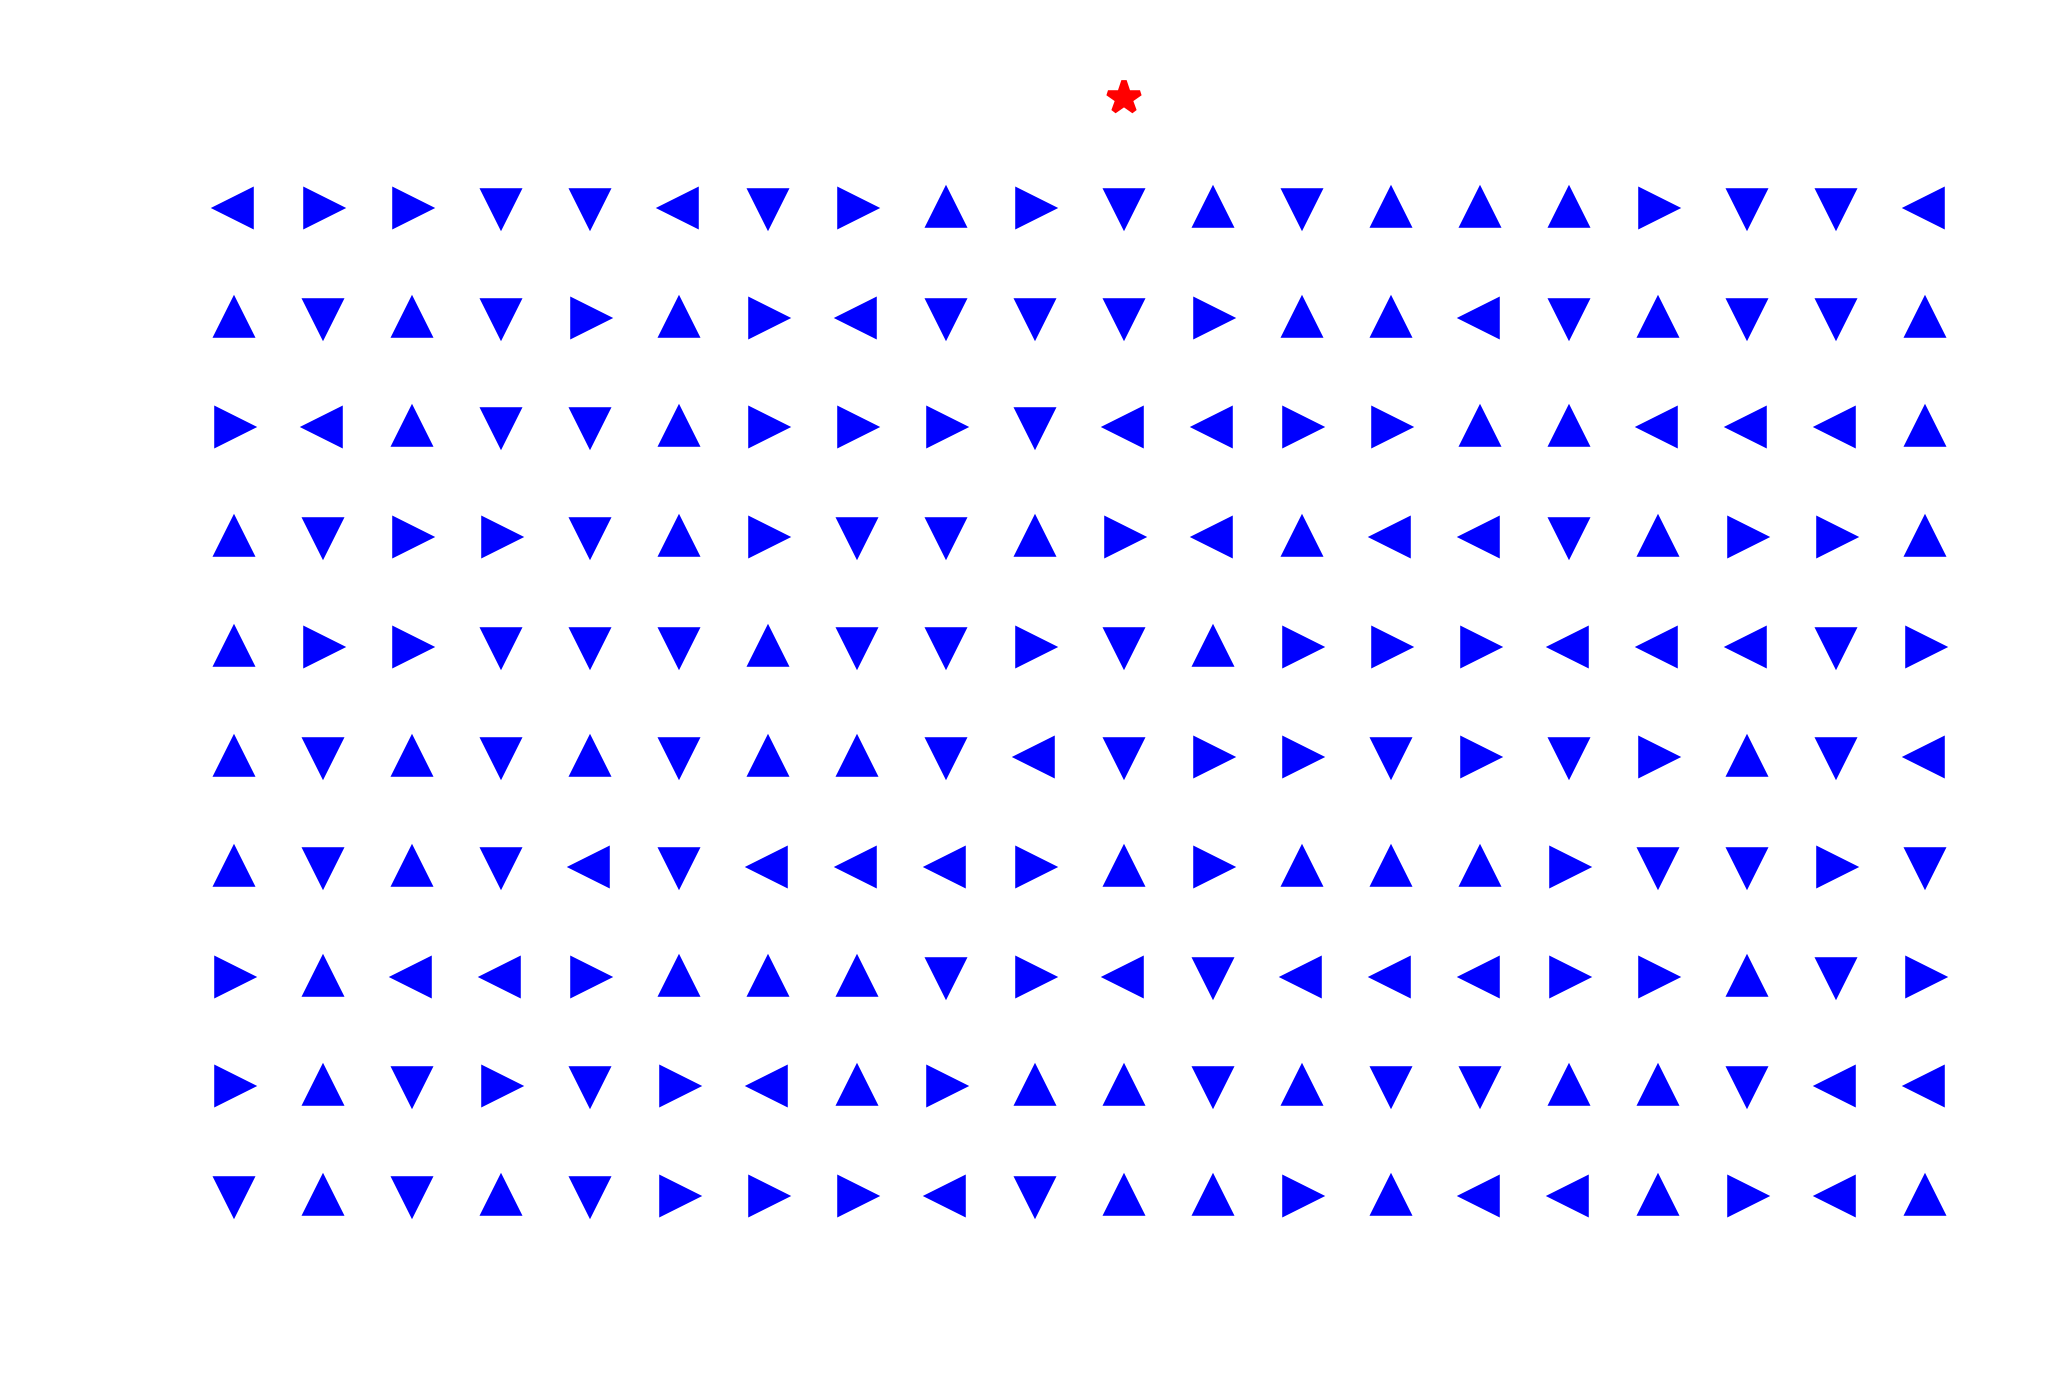

In [29]:
%matplotlib inline

import matplotlib.pyplot as plt
from random import randrange

plt.rcParams['figure.dpi'] = 400 # grossissement de la figure

markers_m, markers_xy = ['v', '<', '^', '>'], [(0,-1), (-1,0), (0,1), (1,0)]

grid = [[randrange(0,4) for _ in range(20)] for _ in range(10)]

for y in range(len(grid)):
    for x in range(len(grid[0])):
        plt.plot([x], [y], marker=markers_m[grid[y][x]], color="blue")
        
plt.plot([10], [10], color='red', marker='*')
plt.axis('off')

Le code ci-dessous recour tà une boucle `while` pour déplacer la fourmi jusqu'à ce qu'elle sorte du labyrinthe ; la boucle s'interrompt quand la fourmi est en position de sortir ; on représente en rouge les cases sur lesquelles la fourmi est passée (au moins une fois) et la position des aiguilles à l'issue du processus (juste avant la sortie de la fourmi) :

Nombre d'étapes : 1094


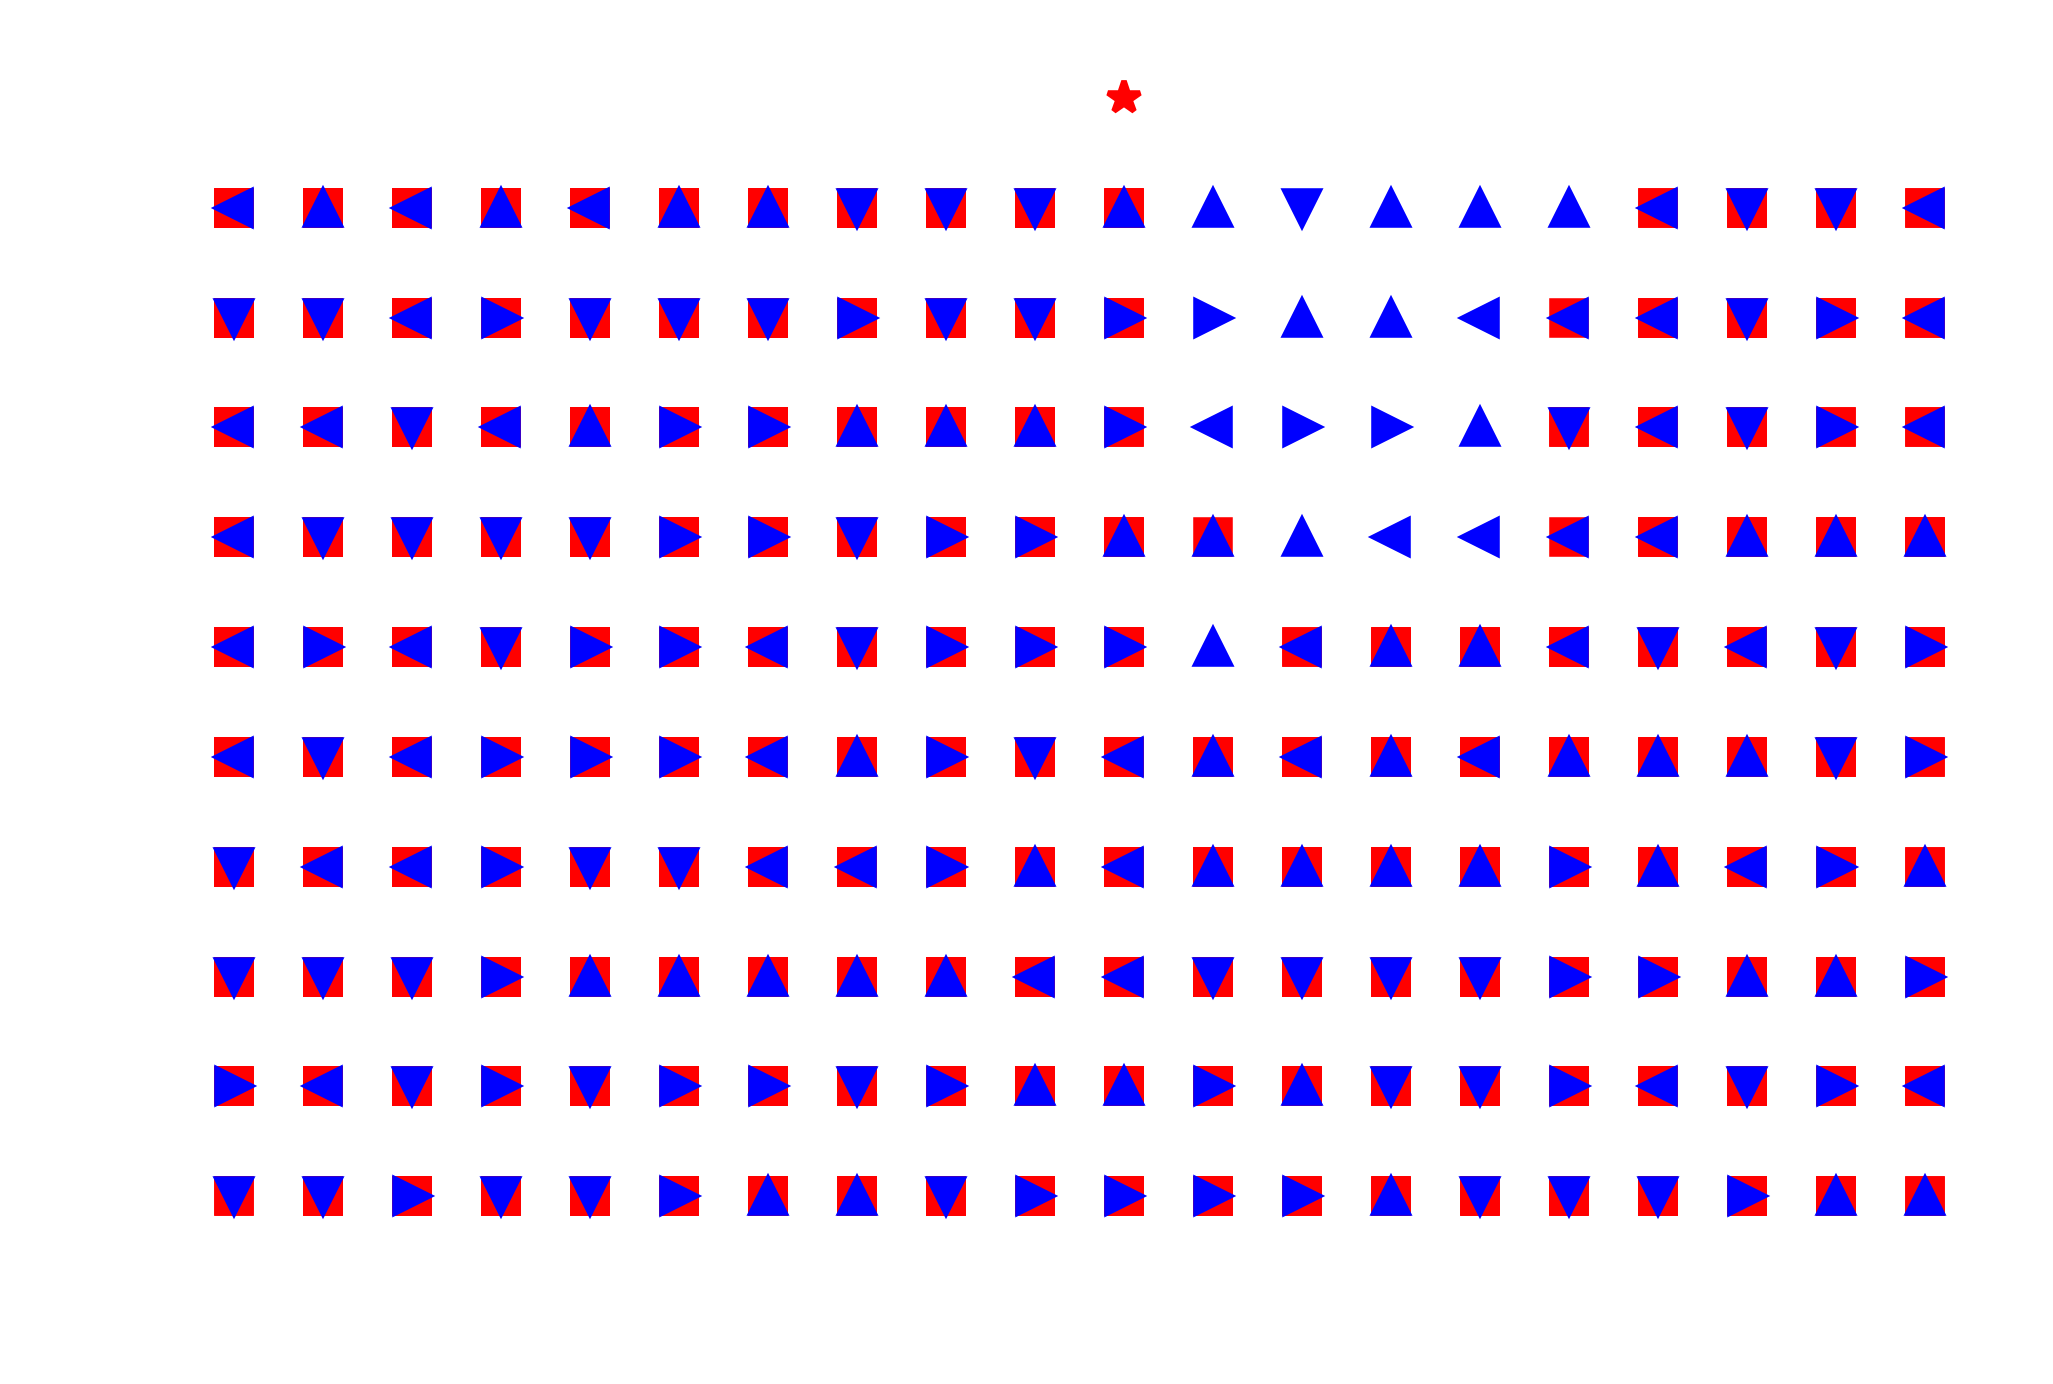

In [30]:
plt.rcParams['figure.dpi'] = 400 # grossissement de la figure

x, y = 3, 7     # position de départ

path = [(x,y)]

while (x!=10) or (y!=9) or (grid[9][10] != 2):
    m = grid[y][x]
    grid[y][x] = (grid[y][x] + 1)%4
    x += markers_xy[m][0]
    y += markers_xy[m][1]
    if x < 0: x = 0
    if x >= len(grid[0]): x = len(grid[0])-1
    if y < 0: y = 0
    if y >= len(grid): y = len(grid)-1
    if (x != path[-1][0]) or (y != path[-1][1]): path.append((x,y))

for x, y in path:
    plt.plot([x], [y], color='red', marker='s')
        
for y in range(len(grid)):
    for x in range(len(grid[0])):
        plt.plot([x], [y], marker=markers_m[grid[y][x]], color="blue")
        
plt.plot([10], [10], color='red', marker='*')
plt.axis('off')

print("Nombre d'étapes :", len(path))

Comment prouver la terminaison de l'algorithme ? Est-il possible de prouver que la fourmi atteindra forcément la case cruciale avec l'aiguille correctement orientée à ce moment ? Malgré les apparences, la preuve est assez simple et repose sur le principe des tiroirs : si la boucle est infinie, il existe au moins une case de la grille sur laquelle la fourmi passe une infinité de fois ; à chaque passe l'aiguille tourne et la fourmi sort donc une infinité de fois par toutes les cases voisines ; de proche en proche on montre qu'elle passe une infinité de fois sur toutes les cases de la grille, donc aussi sur la case cruciale, ce qui est en contradiction avec l'hypothèse de départ (qu'elle ne sort pas).

## Correction d'un algorithme

Un algorithme est _correct_ s'il fait ce qu'on attend de lui. Démontrer la correction de l'algorithme consiste à démontrer que l'algorithme retourne, quand il calcule en partant des données, un objet qui est un des résultats escomptés.

La _terminaison_ à elle seule ne garantit pas la correction de l'algorithme : ce dernier peut s'arrêter dans tous les cas mais éventuellement retourner un résultat non attendu.

In [40]:
def division_par_soustraction(a, b):
    assert b >= 0 and a > 0, "Opération non possible"
    r = a
    q = 0
    while r >= b:
        print("bq+r =", b*q+r,"(invariant)     /    r-b =",r-b,"(variant)")
        r -= b
        q += 1
    return q, r

division_par_soustraction(157, 23)

bq+r = 157 (invariant)     /    r-b = 134 (variant)
bq+r = 157 (invariant)     /    r-b = 111 (variant)
bq+r = 157 (invariant)     /    r-b = 88 (variant)
bq+r = 157 (invariant)     /    r-b = 65 (variant)
bq+r = 157 (invariant)     /    r-b = 42 (variant)
bq+r = 157 (invariant)     /    r-b = 19 (variant)


(6, 19)

Dans le cas de l'algorithme d'Euclide, la justification est mathématique :

    def pgcd(a,b):
        while b > 0:
            r = a%b
            a, b = b, r
        return a

On sait que si `r` est le reste de la division euclidienne de `a` par `b`, PGCD(a, b) = PGCD(b, r). Donc PGCD(a,b) est un invariant de boucle dans l'algorithme.

On a vu précédemment que `b` est un variant de boucle (au bout d'un nombre fini d'étapes, on aura `b==0`) et PGCD(a,b) = a.

In [42]:
def fast_expo(a, n):
    if n==0: return 1
    z = 1
    y = a
    while n>0:
        if n%2==1:
            z *= y
            n -= 1
        else:
            y *= y
            n //= 2
        print("z * y^n =",z * y**n,"(invariant)    /    n =",n,"(variant)")
    return z

fast_expo(3.625,11)

z * y^n = 1420326.270827305 (invariant)    /    n = 10 (variant)
z * y^n = 1420326.270827305 (invariant)    /    n = 5 (variant)
z * y^n = 1420326.270827305 (invariant)    /    n = 4 (variant)
z * y^n = 1420326.270827305 (invariant)    /    n = 2 (variant)
z * y^n = 1420326.270827305 (invariant)    /    n = 1 (variant)
z * y^n = 1420326.270827305 (invariant)    /    n = 0 (variant)


1420326.270827305

## Complexité

L'analyse de la _complexité_ d'un algorithme consiste en l'étude formelle de la quantité de ressources (par exemple de temps ou d'espace) nécessaire à l'exécution de cet algorithme.

La terminaison et la correction d'un algorithme ne suffisent pas à garantir sa pertinence pour effectuer le travail demandé en un temps raisonnable (ou encore en utilisant une quantité raisonnable de mémoire). On jugera donc de la qualité d'un algorithme aussi en calculant le nombre d'opérations (ou de mémoire) nécessaire à son exécution.

#### Exemple de la recherche d'un élément dans une liste triée

Trois méthodes peuvent être comparées pour la recherche d'un élément dans une liste préalablement triée :

  * une recherche naïve par parcours des valeurs successives ;
  * une recherche naïve améliorée qui met fin à la fin à la recherche dès que la valeur cherchée est dépassée ;
  * une recherche dichotomique

In [60]:
# versions brutes

def search1(L, e):
    for i in range(len(L)):
        if L[i] == e: return i
    return len(L)

def search2(L, e):
    for i in range(len(L)):
        if L[i] == e: return i
        if L[i] > e: break
    return len(L)

def search3(L, e):
    a, b = 0, len(L)
    while b-a > 0:
        c = (a+b)//2
        if L[c] == e: return c
        elif L[c] < e: a = c+1
        else: b = c-1
    return len(L)

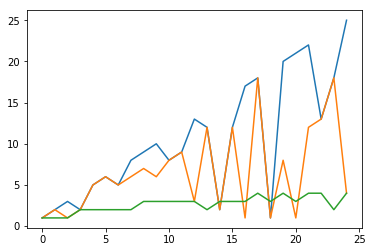

In [63]:
%matplotlib inline

# versions avec compteur : on ne retourne pas la réponse mais le nombre d'étapes

import matplotlib.pyplot as plt
from random import randrange

def search1(L, e):
    nsteps = 0
    for i in range(len(L)):
        nsteps += 1
        if L[i] == e: return nsteps
    return nsteps

def search2(L, e):
    nsteps = 0
    for i in range(len(L)):
        nsteps += 1
        if L[i] == e: return nsteps
        if L[i] > e: break
    return nsteps

def search3(L, e):
    nsteps = 0
    a, b = 0, len(L)
    while b-a > 0:
        nsteps += 1
        c = (a+b)//2
        if L[c] == e: return nsteps
        elif L[c] < e: a = c+1
        else: b = c-1
    return nsteps

t1, t2, t3 = [], [], []
for n in range(1, 26):
    l = [randrange(0, 50) for _ in range(n) ]
    l.sort()
    e = randrange(0, 50)
    t1.append( search1(l, e) )
    t2.append( search2(l, e) )
    t3.append( search3(l, e) )
plt.plot(t1)
plt.plot(t2)
plt.plot(t3)

#### Quelques notations

Il n'est pas pertinent d'essayer de déterminer directement le temps mis par un algorithme car celui-ci dépend fortement du matériel utilisé ; on privilégie donc le calcul du nombre d'opérations (jugées élémentaires) noté ici $C(n)$ en fonction de la taille $n$ du problème (en général la taille d'une liste ou encore la valeur absolue d'une donnée numérique).

C'est plus l'évolution de $C(n)$ que sa valeur exacte qui nous intéresse ici.

On recourt aux notations suivantes :

  * $C(n) = O(u_n)$ lorsque il existe un réel $M$ tel que pour $n$ assez grand, $C(n) \leq M u_n$ ;
  * $C(n) = \Omega(u_n)$ lorsque il existe un réel $m$ tel que pour $n$ assez grand, $C(n) \geq m u_n$ ;
  * $C(n) = \Theta(u_n)$ lorsque $C(n) = O(u_n)$ et $C(n)=\Omega(u_n)$, c'est-à-dire s'il existe deux réels $M$ et $m$ tels que pour $n$ assez grand $ m u_n \leq C(n) \leq M u_n $.

Dans l'exemple ci-dessus, le graphique laisse supposer que la complexité des deux premières recherches est en $O(n)$.

La recherche du minimum ou du maximum, ou encore le calcul de la moyenne, dans une liste (non nécessairement triée) est à la fois en $O(n)$, en $\Omega(n)$ et (donc) en $\Theta(n)$.

La recherche du minimum dans une matrice carrée de taille $n$ est à la fois en $O(n^2)$, en $\Omega(n^2)$ et (donc) en $\Theta(n^2)$.

##### Complexité comparée des différentes méthodes d'évaluation d'un polynôme

L'évaluation naïve est en $\Theta(n^2)$ car le nombre de multiplications suit le modèle $n + (n-1) + (n-2) + \dots + 2 + 1 + 0$ où $n$ est le degré du polynôme.

La méthode Horner est en $\Theta(n)$ puisqu'il y a exactement une multiplication par étape est que le nombre d'étapes est $n+1$ pour un polynôme de degré $n$.

In [65]:
def eval1(P, x):
    s = 0
    for i in range(len(P)):
        s += P[i] * x**(len(P)-i-1) # ici : n-i multiplications
    return s

def eval2(P, x):
    s = 0
    for e in P:
        s = s*x + e # ici : une seule multiplication
    return s

##### Calcul de la complexité de la dichotomie

Soit $k$ un entier tel que $2^k \leq n < 2^{k+1}$. Dans un algorithme dichotomique, à chaque étape, le problème a une taille divisée par 2. On considérera alors que $C(2^k) = O(k)$, ce qui signifie qu'il y aura au plus $k$ étapes.

Avec ces notations, on a :

$$
\begin{array}{lclcl}
C(2^k)&\leq&C(n)&<&C(2^{k+1})\\
k&\leq&C(n)&<&k+1
\end{array}
$$

D'où $C(n)=\Theta(k)$.

La complexité générale d'un tel algorithme est alors en $\Theta(log_2(n))$ :



##### Vocabulaire

  * la complexité est _constante_ quand elle est au mieux en $O(1)$ ;
  * la complexité est _logarithmique_ quand elle est au mieux en $O(log(n))$ ;
  * la complexité est _linéaire_ quand elle est au mieux en $O(n)$ ;
  * la complexité est _quasi linéaire_ quand elle est au mieux en $O(n log(n))$ ;
  * la complexité est _quadratique_ quand elle est au mieux en $O(n^2)$ ;
  * la complexité est _cubique_ quand elle est au mieux en $O(n^3)$ ;
  * la complexité est _polynomiale_ quand il existe un entier $\alpha$ tel que $C(n)=O(n^\alpha)$ ;
  * la complexité est _exponentielle_ quand il existe un entier $\alpha$ tel que $C(n)=O(\alpha^n)$ ;
  * la complexité est _factorielle_ quand elle est au mieux en $O(n!)$.
  
##### Remarques

  * le parcours simple d'une liste est linéaire ; celui d'un table est quadratique ; celui d'un cube est cubique ;
  * les méthodes dichotomiques sont logarithmiques, mais elles sont parfois couplées à un parcours de liste et l'on rencontre souvent une complexité quasi-linéaire ;
  * l'addition de l'écolier est linéaire, la multiplication de l'écolier est quadratique ;
  * le parcours de tous les chemins possibles quand il y a à chaque étapes deux sorties possibles est exponentielle et en $\Theta(2^n)$ ;
  * l'itération sur les permutations d'une (petite) liste est factorielle.
  
Les complexités constante, logarithmique, linéaire et quasi-linéaire ne posent en général pas de problème.

La complexité quadratique doit être contrôlée ; pour des "gros" problèmes, cette complexité peut être considérée comme rédhibitoire.

Les autres complexités sont à réserver à des problèmes de taille raisonnable.

Pour information, dans le cas d'un problème réaliste traitant environ un million de données, peut aboutir à un temps de calcul de quelques dizaines de minutes (complexité quadratique), de quelques dizaines d'années (complexité cubique), et dépasser la durée de vie estimée de l'univers (complexité exponentielle).

Une complexité factorielle est acceptable pour $n$ ne dépassant pas la douzaine.

##### Calcul de la complexité de l'algorithme d'Euclide

On montre aisément que $a$ le plus grand nombre est au moins divisé par 2 toutes les 2 itérations ; en effet :

  * si $b \leq a/2$, alors $r=a \,\textrm{mod}\,(b) < b \leq a/2$ ;
  * si $b > a/2$, alors le quotient vaut $0$ et $r=a \,\textrm{mod}\,(b) = a-b$ avec $a-b<a/2$ (par hypothèse).
  
Après un second appel, $r$ a pris la place de $a$ (par échange).

En notant $k$ le nombre d'étapes :

$$
\begin{array}{rcl}
2^{2 k} &\leq& a \\
2k & \leq& log_2 (a) \\
k&\leq&\frac{1}{2}log_2(a)
\end{array}
$$

La complexité de l'algorithme est donc logarithmique.

In [67]:
def pgcd(a, b):
    while b:
        if b <= a//2:
            print("(a,b) =",(a,b), "avec b <= a/2, le reste vaut", a%b)
        else:
            print("(a,b) =",(a,b), "avec b > a/2, le reste vaut", a%b)
        a, b = b, a%b
    return a

pgcd(36937163, 18851309)

(a,b) = (36937163, 18851309) avec b > a/2, le reste vaut 18085854
(a,b) = (18851309, 18085854) avec b > a/2, le reste vaut 765455
(a,b) = (18085854, 765455) avec b <= a/2, le reste vaut 480389
(a,b) = (765455, 480389) avec b > a/2, le reste vaut 285066
(a,b) = (480389, 285066) avec b > a/2, le reste vaut 195323
(a,b) = (285066, 195323) avec b > a/2, le reste vaut 89743
(a,b) = (195323, 89743) avec b <= a/2, le reste vaut 15837
(a,b) = (89743, 15837) avec b <= a/2, le reste vaut 10558
(a,b) = (15837, 10558) avec b > a/2, le reste vaut 5279
(a,b) = (10558, 5279) avec b <= a/2, le reste vaut 0


5279

#### Pire des cas, meilleur des cas, cas moyen

Le nombres d'opérations peut varier fortement en fonction des données à traiter. Dans ce cas, on distingue en général trois cas :

  * le pire des cas est souvent le plus étudié ; sans précision supplémentaire, c'est parfois lui que l'on désigne en parlant de complexité ; si sa complexité n'est pas la même que dans le cas général, on recourt systématiquement à la notation en $O$ ;
  * le meilleur des cas n'est pas le plus fréquemment calculé car les programmeurs cherchent plutôt à s'assurer qu'un temps maximal de calcul ne sera pas dépassé ; il peut se noter avec la notation en $\Omega$ (moins utilisée que les deux autres) ;
  * le cas moyen est souvent le plus délicat à calculer à moins que le pire et le meilleur des cas aient la même complexité ; il s'agit de l'espérance mathématique de $K(p)$ où $p$ décrit tous les problèmes possibles de taille $n$ et $K(p)$ le nombre d'opération pour traiter le problème $p$.
  
À titre d'exemples, certains tris ont le comportement suivant :

  * en $O(n)$ dans le meilleur des cas pour certains tris spécifiques ;
  * en $O(n log(n))$ dans le cas moyen pour un grand nombre d'algorithmes de tri ;
  * en $O(n log(n))$ dans le pire des cas pour certains algorithmes de tri ;
  * en $O(n^2)$ dans le pire des cas pour certains autres algorithmes.
  
[Tableau plus détaillé](https://en.wikipedia.org/wiki/Best,_worst_and_average_case#Sorting_algorithms)

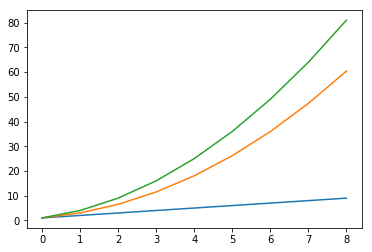

In [74]:
%matplotlib inline

import matplotlib.pyplot as plt

def bubble_sort(l):
    n = len(l)
    stable = False
    nsteps = 0
    while not stable:
        stable = True
        for k in range(1, n):
            if l[k] < l[k-1]:
                l[k-1], l[k] = l[k], l[k-1]
                stable = False
        nsteps += 1
    return nsteps * n

from itertools import permutations

l1, l2, l3 = [], [], []
for n in range(1, 10):
    l = list(range(1, n+1))

    total, mymin, mymax = 0, 10000, 0
    c = 0
    for p in permutations(l):
        nsteps = bubble_sort(list(p))
        total += nsteps
        if nsteps < mymin: mymin = nsteps
        if nsteps > mymax: mymax = nsteps
        c += 1

    l1.append(mymin)
    l2.append(total/c)
    l3.append(mymax)

plt.plot(l1)
plt.plot(l2)
plt.plot(l3)